In [1]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Glass

In [2]:
glass=read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [41]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [31]:
glass.var()

RI      0.000009
Na      0.666841
Mg      2.080540
Al      0.249270
Si      0.599921
K       0.425354
Ca      2.025366
Ba      0.247227
Fe      0.009494
Type    4.425716
dtype: float64

In [36]:
glass_drop=glass.drop(columns=['RI','Fe'])
glass_drop

,Na,Mg,Al,Si,K,Ca,Ba,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,7
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,7
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,7
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,7


In [37]:
array = glass_drop.values
array

array([[13.64,  4.49,  1.1 , ...,  8.75,  0.  ,  1.  ],
       [13.89,  3.6 ,  1.36, ...,  7.83,  0.  ,  1.  ],
       [13.53,  3.55,  1.54, ...,  7.78,  0.  ,  1.  ],
       ...,
       [14.36,  0.  ,  2.02, ...,  8.44,  1.64,  7.  ],
       [14.38,  0.  ,  1.94, ...,  8.48,  1.57,  7.  ],
       [14.23,  0.  ,  2.08, ...,  8.62,  1.67,  7.  ]])

In [49]:
abs(glass_drop.corr())>0.5

,Na,Mg,Al,Si,K,Ca,Ba,Type
Na,True,False,False,False,False,False,False,True
Mg,False,True,False,False,False,False,False,True
Al,False,False,True,False,False,False,False,True
Si,False,False,False,True,False,False,False,False
K,False,False,False,False,True,False,False,False
Ca,False,False,False,False,False,True,False,False
Ba,False,False,False,False,False,False,True,True
Type,True,True,True,False,False,False,True,True


In [50]:
X = array[:, 0:7]
Y = array[:, 7]

In [60]:
glass_drop.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

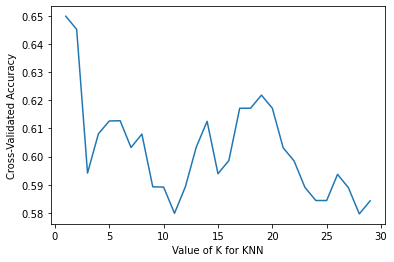

In [51]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 30
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [52]:
# take num_folds = 5
kfold=KFold(n_splits=5)
kfold 

KFold(n_splits=5, random_state=None, shuffle=False)

In [53]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y, cv=5)
results

array([0.55813953, 0.65116279, 0.65116279, 0.6744186 , 0.71428571])

In [54]:
results.mean()

0.6498338870431895

###### Grid Search for Algorithm Tuning for glass

In [55]:
from sklearn.model_selection import GridSearchCV
import numpy

In [56]:
n_neighbors = numpy.array(range(1,30))
param_grid = dict(n_neighbors=n_neighbors)

In [11]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [12]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [13]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


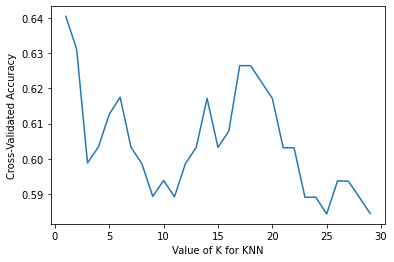

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 30
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [16]:
k_scores

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124,
 0.5937984496124031,
 0.5891472868217054,
 0.5985603543743079,
 0.6032115171650055,
 0.6171650055370985,
 0.6032115171650055,
 0.6078626799557032,
 0.626467331118494,
 0.626467331118494,
 0.6218161683277963,
 0.6171650055370985,
 0.6031007751937983,
 0.6031007751937983,
 0.5890365448504984,
 0.5890365448504984,
 0.5842746400885936,
 0.5936877076411959,
 0.5935769656699889,
 0.5890365448504983,
 0.5843853820598006]

# Zoo

In [17]:
zoo=read_csv('zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [18]:
X1=zoo.iloc[:,1:17]
X1.values

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [19]:
Y1=zoo.iloc[:,17:18]
Y1.values

array([[1],
       [1],
       [4],
       [1],
       [1],
       [1],
       [1],
       [4],
       [4],
       [1],
       [1],
       [2],
       [4],
       [7],
       [7],
       [7],
       [2],
       [1],
       [4],
       [1],
       [2],
       [2],
       [1],
       [2],
       [6],
       [5],
       [5],
       [1],
       [1],
       [1],
       [6],
       [1],
       [1],
       [2],
       [4],
       [1],
       [1],
       [2],
       [4],
       [6],
       [6],
       [2],
       [6],
       [2],
       [1],
       [1],
       [7],
       [1],
       [1],
       [1],
       [1],
       [6],
       [5],
       [7],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [3],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [7],
       [4],
       [1],
       [1],
       [3],
       [7],
       [2],
       [2],
       [3],
       [7],
       [4],
    

In [20]:
# take num_folds = 4
kfold=KFold(n_splits=4)
kfold 

KFold(n_splits=4, random_state=None, shuffle=False)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was

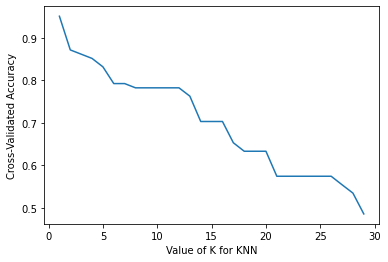

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 30
k_range1 = range(1, 30)
k_scores1 = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn1, X1, Y1, cv=2)
    k_scores1.append(scores.mean())
# plot to see clearly
plt.plot(k_range1, k_scores1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [22]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X1, Y1, cv=kfold)
results

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was

array([1.  , 1.  , 0.92, 0.88])

In [23]:
results.mean()

0.95

In [24]:
k_scores1

[0.9505882352941176,
 0.8713725490196078,
 0.8613725490196078,
 0.8513725490196078,
 0.8315686274509804,
 0.7921568627450981,
 0.7921568627450981,
 0.7821568627450981,
 0.7821568627450981,
 0.7821568627450981,
 0.7821568627450981,
 0.7821568627450981,
 0.7625490196078432,
 0.7029411764705882,
 0.7029411764705882,
 0.7029411764705882,
 0.6529411764705882,
 0.6329411764705883,
 0.6329411764705883,
 0.6329411764705883,
 0.5741176470588236,
 0.5741176470588236,
 0.5741176470588236,
 0.5741176470588236,
 0.5741176470588236,
 0.5741176470588236,
 0.5541176470588236,
 0.5345098039215687,
 0.48549019607843136]

###### Grid Search for Algorithm Tuning for zoo

In [25]:
from sklearn.model_selection import GridSearchCV
import numpy

In [26]:
n_neighbors = numpy.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

In [27]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [28]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])}

In [29]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X1, Y1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}
